In [2]:
%load_ext autoreload
# %load_ext line_profiler
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import decoding_analysis_vis as dav
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy
import xarray as xr
import pickle
import pandas as pd
import sys
sys.path.append('/home/tplas/repos/reproducible_figures/scripts/')
import rep_fig_vis as rfv 
sns.set_palette('colorblind')

In [4]:
all_sess = {}
for st in ['sens', 'proj']:
    all_sess[st] = dav.AllSessions(sess_type=st)


session name : 2020-09-14_RL101.pkl


Excluded 602 out of 2169 neurons
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons
Individual sessions loaded
session name : 2021-02-24_RL132.pkl
Excluded 757 out of 2156 neurons
session name : 2021-02-18_RL127.pkl
Excluded 833 out of 2334 neurons
session name : 2021-02-22_RL128.pkl
Excluded 893 out of 2308 neurons
session name : 2021-02-25_RL131.pkl
Excluded 1361 out of 2448 neurons
session name : 2021-03-02_RL130.pkl
Excluded 518 out of 2258 neurons
session name : 2021-02-23_RL129.pkl
Excluded 1323 out of 2364 neurons
Individual sessions loaded


In [5]:
all_sess['sens'].sess_dict[0].dataset_selector(region='s1')

<xarray.Dataset>
Dimensions:          (neuron: 929, time: 182, trial: 400)
Coordinates:
  * neuron           (neuron) int64 0 1 2 3 5 7 ... 1552 1556 1561 1563 1566
  * time             (time) float64 -2.063 -1.997 -1.93 ... 9.917 9.984 10.05
  * trial            (trial) int64 0 1 2 3 4 5 6 ... 393 394 395 396 397 398 399
Data variables:
    activity         (neuron, time, trial) float32 0.03205 0.01521 ... -0.1685
    cell_s1          (neuron) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    cell_id          (neuron) float64 0.0 1.0 3.0 ... 3.977e+03 3.983e+03
    trial_type       (trial) <U7 'sensory' 'sensory' ... 'whisker' 'whisker'
    frame_array      (time) int64 0 1 2 3 4 5 6 ... 175 176 177 178 179 180 181
    artefact_bool    (time) bool False False False False ... False False False
    targets_sensory  (neuron) float64 1.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    targets_random   (neuron) float64 0.0 0.0 0.0 1.0 0.0 ... 0.0 1.0 1.0 0.0

## Train population decoders:

In [8]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
# i_row, i_col = 0, 0
dict_sess_type_tt = {'sens': ['sensory', 'random', 'whisker'],
                     'proj': ['projecting', 'non_projecting']}
decoder_type = 'LDA'
# t_min = 0.55 
# t_max = 1.65
t_min = 1.1
t_max = 2.2
n_sessions = 6
scores_dict = {}
for i_r, region in enumerate(['s1', 's2']):
    scores_dict[region] = {}
    for sess_type, tt_test_list in dict_sess_type_tt.items():
        print(f'Session type: {sess_type} in region {region}')
        scores_dict[region][sess_type] = {tt: np.zeros(n_sessions) for tt in tt_test_list}
        for i_s in tqdm(range(n_sessions)):
            tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type=sess_type,
                                    prestim_baseline=True)
            for i_tt, tt in enumerate(tt_test_list):
                tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region=region,
                                                            verbose=0, decoder_type=decoder_type,
                                                            t_min=t_min, t_max=t_max)
                scores_dict[region][sess_type][tt][i_s] = np.mean(tmp_score_arr)


Session type: sens in region s1


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:35<00:00,  5.85s/it]


Session type: proj in region s1


100%|██████████| 6/6 [00:20<00:00,  3.50s/it]


Session type: sens in region s2


100%|██████████| 6/6 [00:32<00:00,  5.43s/it]


Session type: proj in region s2


100%|██████████| 6/6 [00:21<00:00,  3.62s/it]


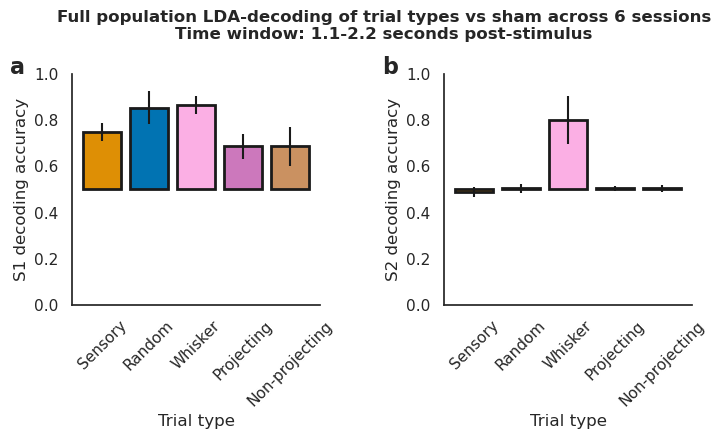

In [10]:
ax = dav.bar_plot_decoder_accuracy(scores_dict=scores_dict, decoder_type=decoder_type, 
                                   t_min=t_min, t_max=t_max, save_fig=True)

## Show average population activity:

Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum
Neurons sorted by sum


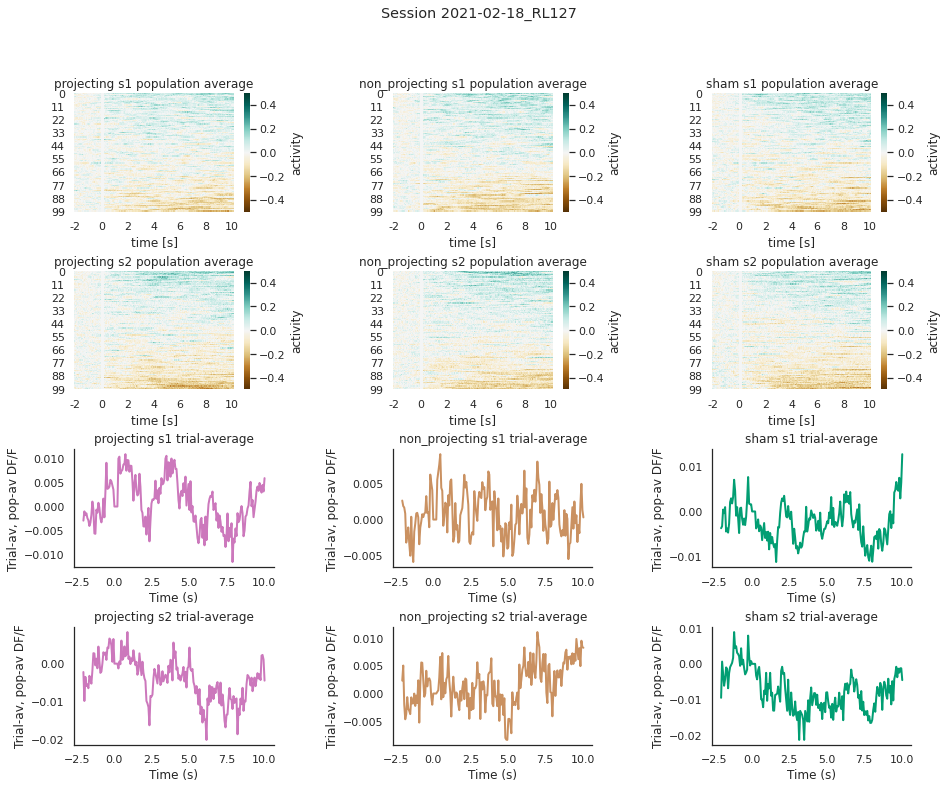

In [14]:
tmps = dav.plot_pop_av(Ses=all_sess['proj'].sess_dict[0],  #tmp, 
                       region_list=['s1', 's2'], sort_trials_per_tt=True,
                        plot_trial_av=True)

# Find responding cells
Using method (and adapted code) from Rowland et al.:

*Neurons were categorised as responsive or unresponsive to stimulus or reward in a trial-wise manner. For each trial, the distribution of ΔF/F values 500 ms pre-stimulus were compared to 500 ms post-stimulus for each cell. A cell was deemed as responsive to a stimulus on an individual trial if it passed a significance threshold of p = 0.05, using a two-sided Wilcoxon signed-rank test, following false discovery rate (FDR) correction. The alpha of the FDR correction (0.015) was set empirically as the value which yielded ∼5% of cells responding on correct rejection trials, where there was no stimulation or licking response. Following significance testing, cells were split into positively and negatively responding cells based on whether the mean ΔF/F value post-stimulus was greater or less than the mean ΔF/F value pre-stimulus respectively. While calcium imaging with GCaMP does not visualise inhibition explicitly, it has been shown that deviations of fluorescence traces below baseline is indicative of inhibition of tonically active neurons79. The fraction of neurons excited or inhibited on a given trial, in a given brain region, was defined as the number of positively or negatively responding cells respectively, divided by the total number of neurons recorded in that brain region on that session.*

**The code to compute responders is now in `compute_responders.py`**

In [6]:
stat_test_use = 'wilcoxon'
fdr_rate_use = '5e-01'

## Load
with open(f'results_responders/df_responders_s1_{stat_test_use}_window-16-timepoints_fdr-{fdr_rate_use}.pkl', 'rb') as f:
    dict_df_responders_s1 = pickle.load(f)

with open(f'results_responders/df_responders_s2_{stat_test_use}_window-16-timepoints_fdr-{fdr_rate_use}.pkl', 'rb') as f:
    dict_df_responders_s2 = pickle.load(f)

dict_df_responders_use = dict_df_responders_s2

In [128]:
dict_df_responders_use['sens'][0]

,percent_positive_responders,percent_negative_responders,n_positive_responders,n_negative_responders,trial_type,trial,session_name_readable
0,13.049096,25.968992,101.0,201.0,sensory,0,2020-09-04_RL093
1,13.178295,27.777778,102.0,215.0,sensory,1,2020-09-04_RL093
2,20.413437,18.217054,158.0,141.0,sensory,2,2020-09-04_RL093
3,29.198966,18.346253,226.0,142.0,sensory,3,2020-09-04_RL093
4,12.015504,20.025840,93.0,155.0,sensory,4,2020-09-04_RL093
...,...,...,...,...,...,...,...
395,18.992248,28.294574,147.0,219.0,whisker,395,2020-09-04_RL093
396,43.023256,8.914729,333.0,69.0,whisker,396,2020-09-04_RL093
397,37.596899,13.178295,291.0,102.0,whisker,397,2020-09-04_RL093
398,15.762274,32.428941,122.0,251.0,whisker,398,2020-09-04_RL093


-0.07977606167044776
(-0.07977606167044782, 0.4301181964113856)


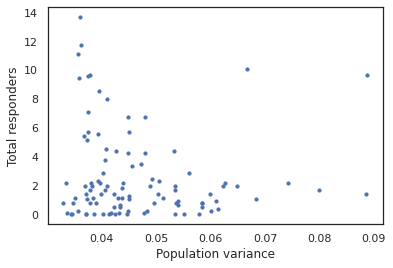

In [42]:
sess_type = 'sens'
sess_id = 0

trial_slice = slice(300, 400)
curr_df = dict_df_responders_use[sess_type][sess_id][trial_slice]
curr_ds = all_sess[sess_type].sess_dict[sess_id].full_ds
# plt.scatter(curr_df['percent_positive_responders'], curr_df['percent_negative_responders'], s=10)
# np.corrcoef(curr_df['percent_positive_responders'], curr_df['percent_negative_responders'])
total_responders = curr_df['percent_positive_responders'] + curr_df['percent_negative_responders']
inds_sorted = np.argsort(total_responders)
metric_plot = curr_ds.sel(time=slice(-0.6, -0.1)).mean('time').var('neuron').activity[trial_slice]
# metric_plot = np.log(metric_plot)
## z-score2
# metric_plot = (metric_plot - metric_plot.mean()) / metric_plot.std()
plt.scatter(metric_plot, total_responders, s=10)
plt.xlabel('Population variance')
plt.ylabel('Total responders')
print(np.corrcoef(metric_plot, total_responders)[1, 0])
print(scipy.stats.pearsonr(metric_plot, total_responders))

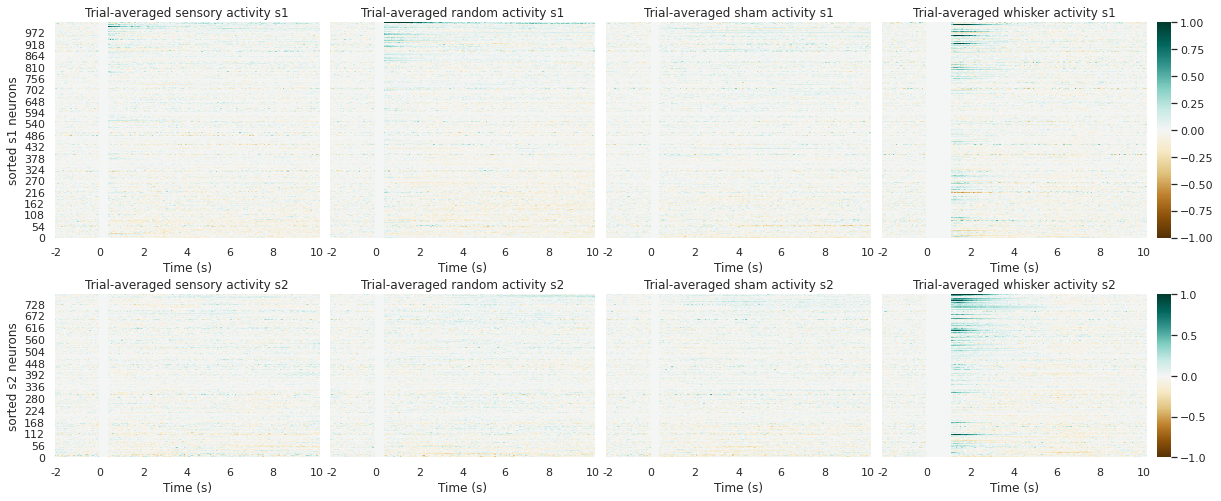

In [13]:
sess_type = 'sens'
sess_id = 0
full_ds = all_sess[sess_type].sess_dict[sess_id].full_ds
n_trialtypes = len(np.unique(full_ds.trial_type)) 
fraction_s1_neuron = np.sum(full_ds.cell_s1) / len(full_ds.cell_s1)
save_path = '/home/tplas/repos/S1S2_mechanisms/jupyter/thijs/figs/figs_trial-average_activity_per_session/'
save_fig = False
rasterize_heatmaps = True

fig, ax = plt.subplots(2, n_trialtypes + 1, figsize=(5 * n_trialtypes, 8), gridspec_kw={'wspace': 0.05, 'hspace': 0.3 ,'width_ratios': [1] * n_trialtypes + [0.05],
                                                           'height_ratios': [fraction_s1_neuron, 1 - fraction_s1_neuron]})
# inds_sorted_neurons = np.argsort(full_ds.activity.mean(['trial', 'time']).data)
inds_sorted_neurons_dict = {'s1': np.argsort(full_ds.activity.mean(['trial', 'time']).sel(neuron=full_ds.cell_s1).data),
                            's2': np.argsort(full_ds.activity.mean(['trial', 'time']).sel(neuron=np.logical_not(full_ds.cell_s1)).data)}

for i_trial in range(n_trialtypes):
    start_trial = i_trial * 100 
    end_trial = (i_trial + 1) * 100 - 1
    trial_slice = slice(start_trial, end_trial)
    # curr_df = dict_df_responders_use[sess_type][sess_id][trial_slice]
    curr_ds = full_ds.sel(trial=trial_slice)
    assert len(np.unique(curr_ds.trial_type)) == 1, f'There are multiple trial types in this slice: {curr_ds.trial_type}'
    assert curr_ds.dims['trial'] == 100
    current_trialtype = curr_ds.trial_type[0].data

    for ir, region in enumerate(['s1', 's2']):
        # plot_data = curr_ds.activity.sel(trial=86 + i_trial * 100).sel(neuron=curr_ds.cell_s1 if region == 's1' else np.logical_not(curr_ds.cell_s1)).data 
        plot_data = curr_ds.activity.mean('trial').sel(neuron=curr_ds.cell_s1 if region == 's1' else np.logical_not(curr_ds.cell_s1)).data 
        plot_data = plot_data[inds_sorted_neurons_dict[region]]

        sns.heatmap(plot_data, cmap='BrBG', vmin=-1, vmax=1, ax=ax[ir, i_trial], 
                    cbar=True if i_trial == n_trialtypes - 1 else False, cbar_ax=ax[ir, -1],
                    rasterized=rasterize_heatmaps)
        if i_trial == 0:
            ax[ir, i_trial].set_ylabel(f'sorted {region} neurons')
        else:
            ax[ir, i_trial].set_ylabel('')
            ## remove yticklabels 
            ax[ir, i_trial].set_yticklabels([])
        ax[ir, i_trial].set_xlabel('Time (s)')
        dav.create_time_axis(ax=ax[ir, i_trial], time_arr=curr_ds.time.data, label_list=[-2, 0, 2, 4, 6, 8, 10])
        ax[ir, i_trial].set_title(f'Trial-averaged {current_trialtype} activity {region}')
        ax[ir, i_trial].invert_yaxis()

if save_fig:
    plt.savefig(save_path + f'trial-averaged_activity_session-{sess_type}-{sess_id}.pdf', bbox_to_anchor='tight')

In [129]:
inds_blanked_out = np.where(curr_ds.activity.mean(['neuron', 'trial']) == 0)[0]
curr_ds.time[inds_blanked_out]

<xarray.DataArray 'time' (time: 17)>
array([0.0114  , 0.078332, 0.145263, 0.212195, 0.279126, 0.346058, 0.412989,
       0.47992 , 0.546852, 0.613783, 0.680715, 0.747646, 0.814578, 0.881509,
       0.948441, 1.015372, 1.082303])
Coordinates:
  * time     (time) float64 0.0114 0.07833 0.1453 0.2122 ... 0.9484 1.015 1.082
Attributes:
    units:    s

In [15]:
dict_df_responders_s2[sess_type][sess_id].groupby(['trial_type', 'session_name_readable']).mean()

,,percent_positive_responders,percent_negative_responders,n_positive_responders,n_negative_responders,trial
trial_type,session_name_readable,,,,,
random,2020-09-04_RL093,2.158915,1.855297,16.71,14.36,149.5
sensory,2020-09-04_RL093,2.382429,2.121447,18.44,16.42,49.5
sham,2020-09-04_RL093,2.122739,1.820413,16.43,14.09,249.5
whisker,2020-09-04_RL093,6.303618,1.697674,48.79,13.14,349.5


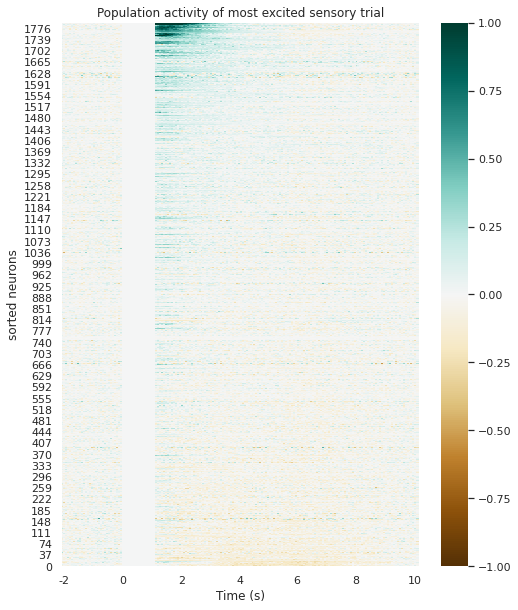

In [16]:
# plot_data = curr_ds.activity.sel(trial=inds_sorted.to_numpy()[4]).data
plot_data = curr_ds.activity.mean('trial').data
inds_sorted_neurons = np.argsort(plot_data.mean(1))
plot_data = plot_data[inds_sorted_neurons]

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
sns.heatmap(plot_data, cmap='BrBG', vmin=-1, vmax=1, ax=ax)
ax.set_ylabel('sorted neurons')
ax.set_xlabel('Time (s)')
dav.create_time_axis(ax=ax, time_arr=curr_ds.time.data, label_list=[-2, 0, 2, 4, 6, 8, 10])
ax.set_title('Population activity of most excited sensory trial')
ax.invert_yaxis()

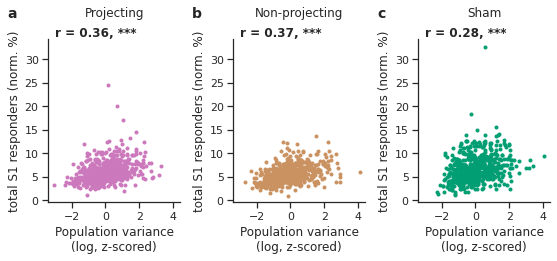

In [252]:
st = 'proj'
df_s1_comb, df_s2_comb = dav.load_responders_different()
dict_df_responders_use = df_s2_comb
dav.overview_plot_metric_vs_responders(sess_dict=all_sess[st].sess_dict, sess_type=st,
                                       dict_df_responders_s1=df_s1_comb, dict_df_responders_s2=df_s2_comb,
                                       region_use='s1',
                                       metric ='pop_var', zscore_metric=True, 
                                       response_type='total', 
                                       plot_individual_sessions=False,
                                       save_fig=True)

Text(0.5, 1.0, 'S2 responding cells')

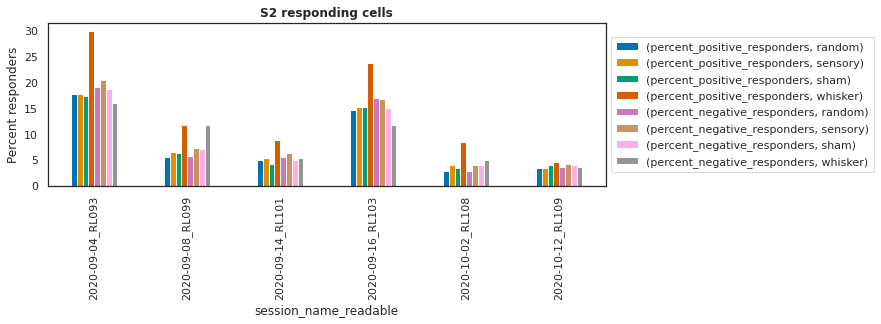

In [7]:
dict_df_responders_use = dict_df_responders_s2
df_concat = pd.concat(list(dict_df_responders_use['sens'].values()))
# df_concat = tmp
df_tmp_result = df_concat.groupby(['session_name_readable', 'trial_type',]).mean()
for col_tmp in ['n_positive_responders_targets', 'n_negative_responders_targets', 'n_positive_responders', 'n_negative_responders', 'trial', ]:
    if col_tmp in df_tmp_result.columns:
        df_tmp_result = df_tmp_result.drop(col_tmp, axis=1)
for col in ['percent_positive_responders', 'percent_negative_responders']:
    df_tmp_result[col] = df_tmp_result[col].apply(lambda x: round(x, 1))

# sns.barplot(df_tmp_result)
sns.set_palette('colorblind')
fig, ax  = plt.subplots(1,1, figsize=(10, 3))
df_tmp_result.unstack().plot(kind='bar', legend=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percent responders')
plt.title('S2 responding cells', weight='bold')

(0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
Mean values sham_sens: fdr
0.01     1.229880
0.02     1.770376
0.05     2.820550
0.10     4.172219
0.30     9.548639
0.50    17.442614
Name: percent_total_responders, dtype: float64

--

Std values sham_sens: fdr
0.01     1.587749
0.02     2.111209
0.05     3.174056
0.10     4.558366
0.30     8.736655
0.50    12.485936
Name: percent_total_responders, dtype: float64


Mean values sham_proj: fdr
0.01     3.228316
0.02     4.286862
0.05     6.285531
0.10     8.716956
0.30    17.907385
0.50    29.529749
Name: percent_total_responders, dtype: float64

--

Std values sham_proj: fdr
0.01    1.693759
0.02    2.098096
0.05    2.710809
0.10    3.422867
0.30    5.427240
0.50    6.502592
Name: percent_total_responders, dtype: float64




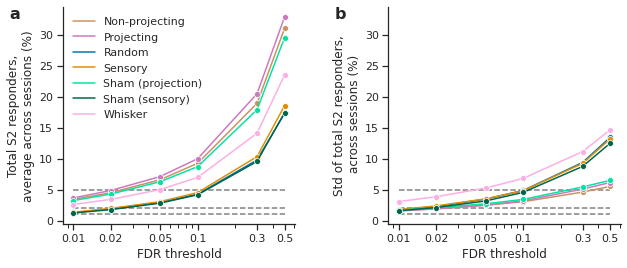

In [22]:
tmp = dav.plot_effect_fdr_responders(save_fig=True, print_sham_stats=True)

In [139]:
tmp[tmp['trial_type'] == 'Sham'].groupby('fdr').mean()

,percent_positive_responders,percent_negative_responders,percent_total_responders
fdr,,,
0.01,1.136952,1.092146,2.229098
0.02,1.525863,1.502756,3.028619
0.05,2.263226,2.289814,4.553041
0.10,3.161876,3.282712,6.444587
0.30,6.625837,7.102175,13.728012
0.50,11.260342,12.225840,23.486181


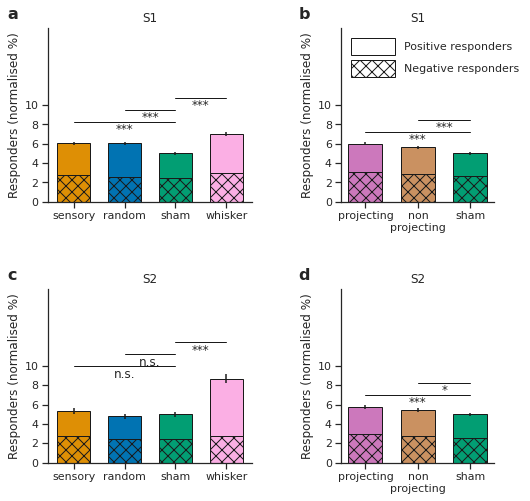

In [258]:
save_fig = False

df_s1_comb, df_s2_comb = dav.load_responders_different(stat_test_use='ttest')
fig, ax = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.5, 'hspace': 0.5, 'width_ratios': [4, 3]})
for i_st, st in enumerate(['sens', 'proj']):
    for i_ax, dict_df_resp in enumerate([df_s1_comb, df_s2_comb]):
        tmp = dav.plot_average_responders_per_trial_type(dict_df_responders=dict_df_resp, sess_type=st, ax=ax[i_ax, i_st],
                                                        plot_pos_neg_separately=False, n_bonf=10,
                                                        plot_legend=(st =='proj' and i_ax == 0),
                                                        plot_stats=True,
                                                        # add_y=1.5,
                                                        #  list_tt_ignore=['sensory'])
                                                        # list_trial_numbers_ignore=list(np.concatenate([np.arange(10 + x, 100 + x) for x in 100 * np.arange(4)]))
        )
        ax[i_ax, i_st].set_ylim([0, 18])
    ax[0, i_st].set_title(f'S1') # (first 10 trial only)')
    ax[1, i_st].set_title(f'S2') # (first 10 trial only)')

for i_lab, lab in enumerate('abcd'):
    ax.flatten()[i_lab].annotate(lab, (-0.2 - 0.08 * (i_lab % 2), 1.05), xycoords='axes fraction', weight='bold', fontsize=16)

if save_fig:
    plt.savefig('figs/fig_barplots_av_responders_first10trials.pdf', bbox_inches='tight')

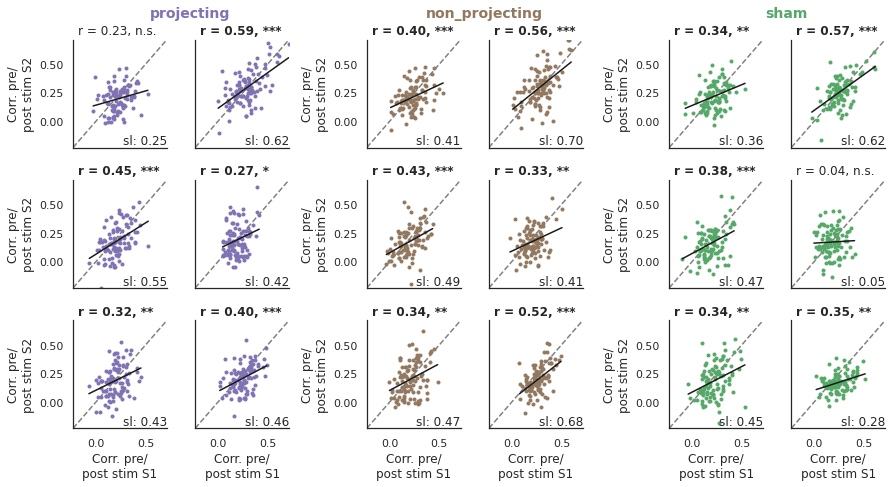

In [117]:
st = 'proj'
tmp = dav.overview_plot_correlations(sess_dict=all_sess[st].sess_dict, sess_type=st, 
                               comparison='pre_vs_post',
                            # comparison='s1_vs_s2',
                               append_to_title='')

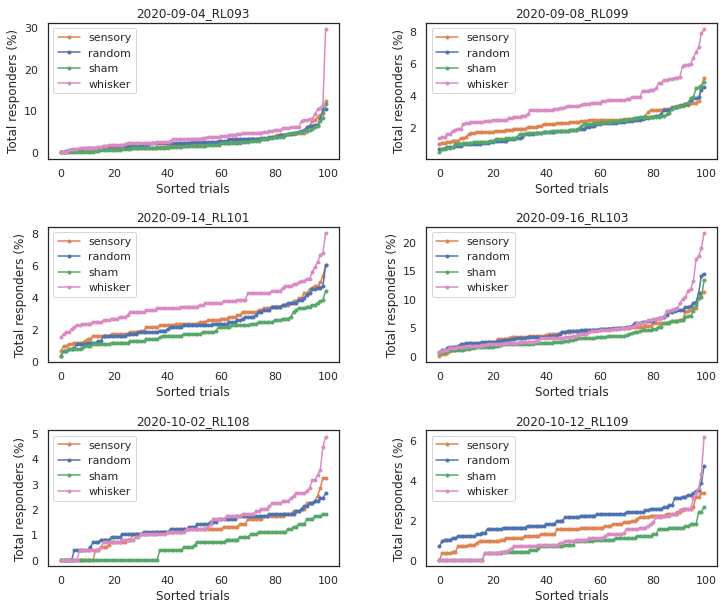

In [32]:
dav.plot_sorted_responders_per_trial_type(dict_df_responders=dict_df_responders_s1['sens'])

sens 0
R-squared (linear): 0.28, R-squared (exponential): 0.33
sens 1
R-squared (linear): 0.23, R-squared (exponential): 0.28
proj 0
R-squared (linear): 0.46, R-squared (exponential): 0.46
proj 1
R-squared (linear): 0.42, R-squared (exponential): 0.57


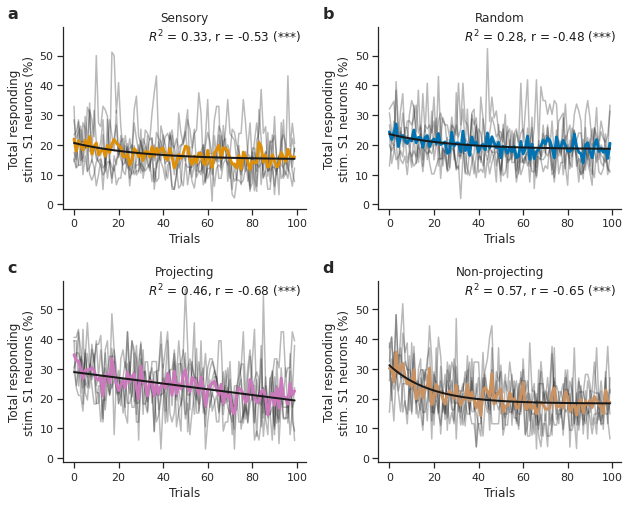

In [227]:
dav.plot_change_target_response(dict_df_responders_s1=df_s1_comb, save_fig=True)


## Similarity spont vs stim

In [25]:
tmp_ds = all_sess['proj'].sess_dict[0].full_ds
# tmp_ds = tmp_ds.sel(neuron=tmp_ds.cell_s1).sel(trial=slice(0, 100))
# stim_vector = tmp_ds.targets_sensory.values.astype(int)
# print(f'Number of targeted neurons: {np.sum(stim_vector)}')

# activity_vector_per_trial = tmp_ds.activity.sel(time=slice(-0.6, -0.1)).mean('time')
# similarity_array = np.dot(stim_vector, activity_vector_per_trial.values)
# similarity_array

(array([ 3., 14., 39., 50., 64., 62., 32., 21., 12.,  3.]),
 array([-0.08061209, -0.01968514,  0.04124181,  0.10216876,  0.16309571,
         0.22402266,  0.28494961,  0.34587656,  0.40680351,  0.46773046,
         0.52865742]),
 <BarContainer object of 10 artists>)

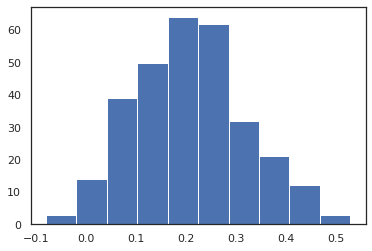

In [26]:
tmp_ds_pre = tmp_ds.sel(time=slice(-0.6, -0.1)).sel(neuron=np.logical_not(tmp_ds.cell_s1)).mean('time')
tmp_ds_post = tmp_ds.sel(time=slice(0.6, 1.1)).sel(neuron=np.logical_not(tmp_ds.cell_s1)).mean('time')

n_trials = 300
cc_trials = np.zeros(n_trials)
for i_trial in range(n_trials):
    cc = np.corrcoef(tmp_ds_pre.sel(trial=i_trial).activity.values, tmp_ds_post.sel(trial=i_trial).activity.values)
    cc = cc[0, 1]
    cc_trials[i_trial] = cc

plt.hist(cc_trials)

# tmp_cc = np.corrcoef(tmp_ds_pre.activity.values.T, tmp_ds_post.activity.values.T)
# print(tmp_ds_pre.activity.shape)
# # tmp_cc.shape

# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# sns.heatmap(tmp_cc, cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
#             ax=ax, xticklabels=False, yticklabels=False)

In [ ]:
n_pos_resp, n_neg_resp, tmp_ds, df_results = dav.get_percent_cells_responding(session=all_sess['sens'].sess_dict[0], 
                                                                               fdr_rate=0.1,
                                                                               get_responders_targets=True,
                                                                                region='s1')

In [91]:
df_results


,percent_positive_responders,percent_negative_responders,n_positive_responders,n_negative_responders,trial_type,trial,session_name_readable,n_positive_responders_targets,n_negative_responders_targets
0,4.015671,5.680705,41.0,58.0,sensory,0,2020-09-04_RL093,9.890110,4.395604
1,3.917728,9.500490,40.0,97.0,sensory,1,2020-09-04_RL093,10.989011,9.890110
2,4.113614,2.448580,42.0,25.0,sensory,2,2020-09-04_RL093,10.989011,2.197802
3,6.856024,4.701273,70.0,48.0,sensory,3,2020-09-04_RL093,9.890110,3.296703
4,10.871694,4.701273,111.0,48.0,sensory,4,2020-09-04_RL093,26.373626,1.098901
...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.0,0.0,whisker,395,2020-09-04_RL093,NaN,NaN
396,1.958864,0.195886,20.0,2.0,whisker,396,2020-09-04_RL093,NaN,NaN
397,0.000000,0.195886,0.0,2.0,whisker,397,2020-09-04_RL093,NaN,NaN
398,0.000000,0.293830,0.0,3.0,whisker,398,2020-09-04_RL093,NaN,NaN
